## MLT lab 3, Grigoryev Mikhail, J4133c

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
# set function and gradient
def f(t):
    r = np.sqrt(t[0]**2 + t[1]**2)
    return -0.4 + (t[0]+15)/30.0 + (t[1]+15)/40.0 + 0.5*np.sin(r)

def drdx(t):
    return (.5*(t[0]**2 + t[1]**2)**-.5)*(2*t[0])

def drdy(t):
    return (.5*(t[0]**2 + t[1]**2)**-.5)*(2*t[1])
    
def dfdx(t):
    r = np.sqrt(t[0]**2 + t[1]**2)
    return 1/30. + .5*np.cos(r)*drdx(t)
    
def dfdy(t):
    r = np.sqrt(t[0]**2 + t[1]**2)
    return 1/40. + .5*np.cos(r)*drdy(t)
    
def grad_f(t):
    return np.array([dfdx(t), dfdy(t)])

In [3]:
scale = 7

Text(0.5, 0, 'z')

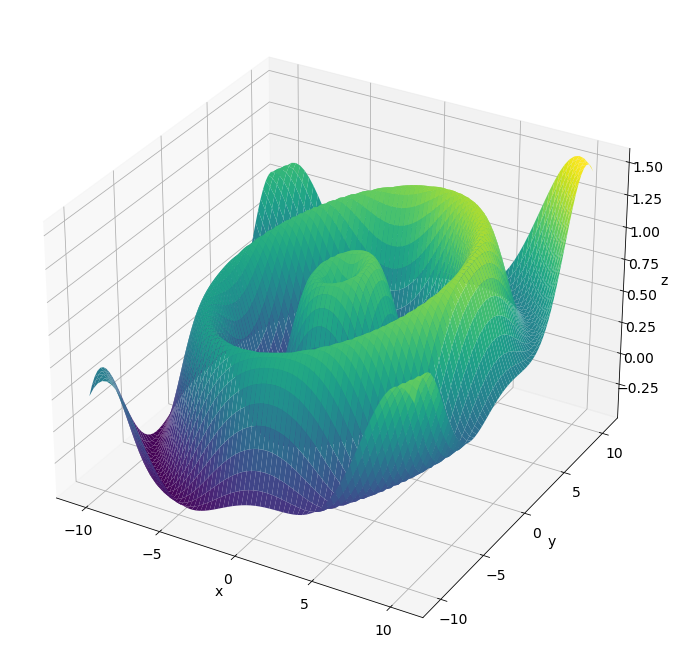

In [4]:
x = np.linspace(-1.5*scale, 1.5*scale, 10*scale)
y = np.linspace(-1.5*scale, 1.5*scale, 10*scale)
x, y = np.meshgrid(x, y)
z = f((x, y))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [5]:
def gd_momentum_2d(f, grad_f, t0, alpha=0.01, beta=0.9, epsilon=1e-8, max_iter=2000):
    assert len(t0) == 2, "Initial point is not dim2."
    t0 = np.array(t0)
    t_prev = t0 - 10 * epsilon
    t = t0.copy()
    
    # moment
    m = np.array([0.0, 0.0])
    
    iteration = 0
    print("iter\tx\ty")
    while np.linalg.norm(t - t_prev) > epsilon and iteration < max_iter:
        t_prev = t.copy()
        g = grad_f(t)
        for i in range(2):
            m[i] = beta * m[i] + (1.0 - beta) * g[i]
            t[i] = t[i] - alpha * m[i]
        if iteration % 10000 == 0:
            print(f"{iteration}\t{t[0]:.4f}\t{t[1]:.4f}")
        iteration += 1
        xdots1.append(t[0])
        ydots1.append(t[1])
        
    return t

In [6]:
def adam_2d(f, grad_f, t0, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=2000):
    assert len(t0) == 2, "Initial point is not dim2."
    t0 = np.array(t0)
    t_prev = t0 - 10 * epsilon
    t = t0.copy()
    
    # moments
    m = np.array([0.0, 0.0])
    v = np.array([0.0, 0.0])
    
    iteration = 0
    print("iter\tx\ty")
    while np.linalg.norm(t - t_prev) > epsilon and iteration < max_iter:
        t_prev = t.copy()
        g = grad_f(t)
        for i in range(2):
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            mhat = m[i] / (1.0 - beta1**(iteration+1))
            vhat = v[i] / (1.0 - beta2**(iteration+1))
            t[i] = t[i] - alpha * mhat / (np.sqrt(vhat) + epsilon)
        if iteration % 300 == 0:
            print(f"{iteration}\t{t[0]:.4f}\t{t[1]:.4f}")
        iteration += 1
        xdots2.append(t[0])
        ydots2.append(t[1])
    
    return t

In [7]:
t0 = [-6.0, 3.0]

In [8]:
# gradient descent with momentum
xdots1, ydots1 = [], []

approx = gd_momentum_2d(f=f,
                        grad_f=grad_f,
                        t0=t0,
                        alpha=0.02,
                        beta=0.9,
                        epsilon = 1e-8,
                        max_iter = 7e4)
print(approx)

iter	x	y
0	-5.9993	2.9995
10000	-4.3638	-1.9843
20000	-3.9436	-2.7290
30000	-3.8558	-2.8517
40000	-3.8400	-2.8730
50000	-3.8372	-2.8767
60000	-3.8368	-2.8774
[-3.83668972 -2.87744548]


In [9]:
# adam optimizer
xdots2, ydots2 = [], []

approx = adam_2d(f=f,
                 grad_f=grad_f,
                 t0=t0,
                 alpha=0.01,
                 beta1=0.9,
                 beta2=0.999,
                 epsilon = 1e-8,
                 max_iter = 5e3)
print(approx)

iter	x	y
0	-5.9900	2.9900
300	-4.5760	1.2889
600	-4.7485	0.4449
900	-4.7580	-0.5221
1200	-4.5958	-1.3679
1500	-4.3674	-1.9855
1800	-4.1604	-2.3890
2100	-4.0105	-2.6317
2400	-3.9184	-2.7660
2700	-3.8699	-2.8330
3000	-3.8481	-2.8623
3300	-3.8399	-2.8732
3600	-3.8374	-2.8765
3900	-3.8368	-2.8773
4200	-3.8367	-2.8775
4500	-3.8367	-2.8775
[-3.8366559  -2.87749058]


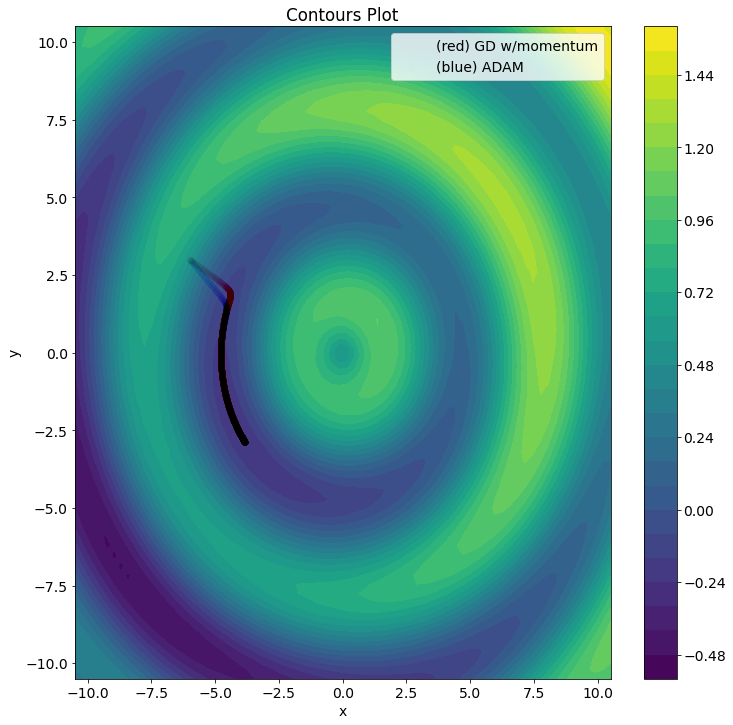

In [10]:
fig, ax = plt.subplots(1,1)
cp = ax.contourf(x, y, z, levels=32)
fig.colorbar(cp)
ax.set_title('Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(xdots1, ydots1, marker='o', color='red', alpha=5e-3, label='(red) GD w/momentum')
ax.scatter(xdots2, ydots2, marker='o', color='blue', alpha=5e-3, label='(blue) ADAM')
ax.legend()

(-100.0, 5100.0)

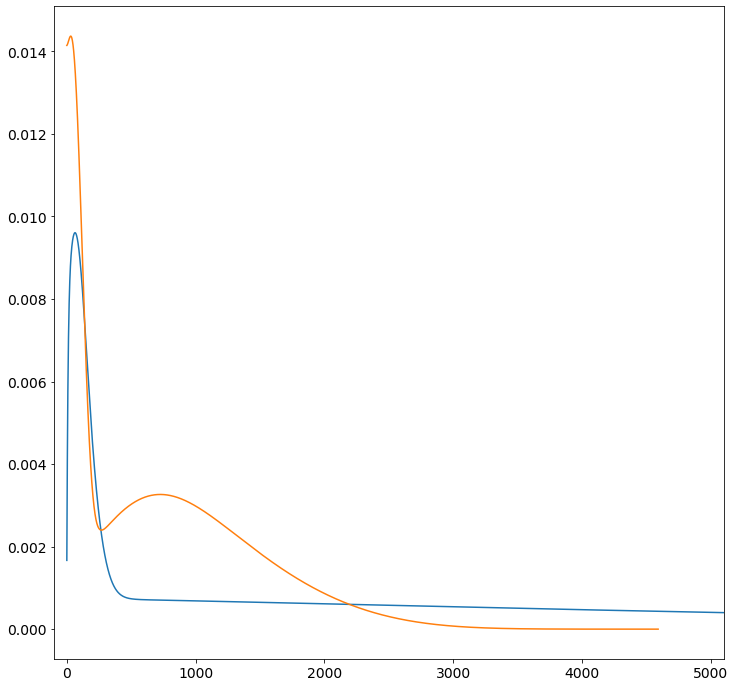

In [11]:
points1 = [np.array([xdots1[i], ydots1[i]]) for i in range(len(xdots1))]
points2 = [np.array([xdots2[i], ydots2[i]]) for i in range(len(xdots2))]

delta1 = [np.linalg.norm(points1[i] - points1[i-1]) for i in range(1, len(points1))]
delta2 = [np.linalg.norm(points2[i] - points2[i-1]) for i in range(1, len(points2))]

plt.plot(delta1)
plt.plot(delta2)
plt.xlim([-100, 5100])

Conclusions:
- both GD with momentum and ADAM optimizer are capable of minimizing functions of two variables;
- both algorithms converged to the same minimum point: `[-3.83668972 -2.87744548]` for GDM, `[-3.8366559  -2.87749058]` for ADAM;
- to fully converge to $\varepsilon = 10^{-8}$ (with the same learning rate $\alpha = 0.01$), GDM took more than 66000 iterations while ADAM took less than 5000, which is 1 order of magnitude, thus ADAM is significantly more efficient.